# Decision Tree - Company data - 
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the 
car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

data = pd.read_csv(r"D:\Assignments\assignment 14 - Decision trees\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [2]:
data.shape

(400, 11)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data['Sales'].unique().round()

array([10., 11., 10.,  7.,  4., 11.,  7., 12.,  7.,  5.,  9., 12.,  4.,
       11., 11.,  9.,  8., 12., 14.,  9.,  6., 12.,  5.,  6., 10., 15.,
        8.,  5.,  3.,  8., 14.,  8.,  6.,  9.,  3., 11.,  9.,  5.,  7.,
        3.,  2.,  8., 10.,  4.,  4.,  5., 12.,  4.,  4., 11.,  1.,  4.,
        8.,  7.,  5.,  7., 12.,  1.,  5.,  5.,  8.,  7.,  2.,  8.,  8.,
        9., 13.,  8.,  9.,  6.,  6., 13.,  9., 11.,  8.,  4.,  9.,  8.,
        8., 12.,  2.,  9., 12.,  7.,  8.,  5.,  5.,  5.,  9.,  8.,  6.,
        9.,  7., 12.,  5.,  4.,  5.,  5.,  5.,  6.,  0.,  3.,  9.,  9.,
        7.,  7.,  6.,  9.,  9.,  9.,  8.,  7.,  7., 12.,  7.,  8.,  9.,
        9., 11.,  7.,  5.,  4.,  8., 10.,  8.,  4.,  6.,  5., 10., 12.,
        6.,  7.,  7.,  1.,  9.,  4., 11.,  8., 11., 10., 11.,  8.,  6.,
        7.,  8.,  7., 10., 13.,  9.,  5.,  3.,  4.,  6.,  8.,  0.,  7.,
        7.,  9.,  6.,  0.,  8.,  6., 10., 11.,  8.,  5.,  7.,  5.,  5.,
       10., 10.,  9.,  8., 12.,  9., 13.,  7.,  4.,  4.,  3.,  4

In [6]:
data['Sales_Efficiency'] = data.Sales.map(lambda x: 'High' if x>=7 else 'Low')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Efficiency
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,High
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [7]:
data1= pd.get_dummies(data,columns=['ShelveLoc','Urban','US'])
data1.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_Efficiency,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,High,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,High,0,1,0,0,1,0,1


In [8]:
feature_columns=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
X = data1[feature_columns]
Y = data1['Sales_Efficiency']

In [9]:
Y.value_counts()

High    216
Low     184
Name: Sales_Efficiency, dtype: int64

In [10]:
X.value_counts

<bound method DataFrame.value_counts of      CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Y

In [11]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=0)
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
model.get_n_leaves()

7

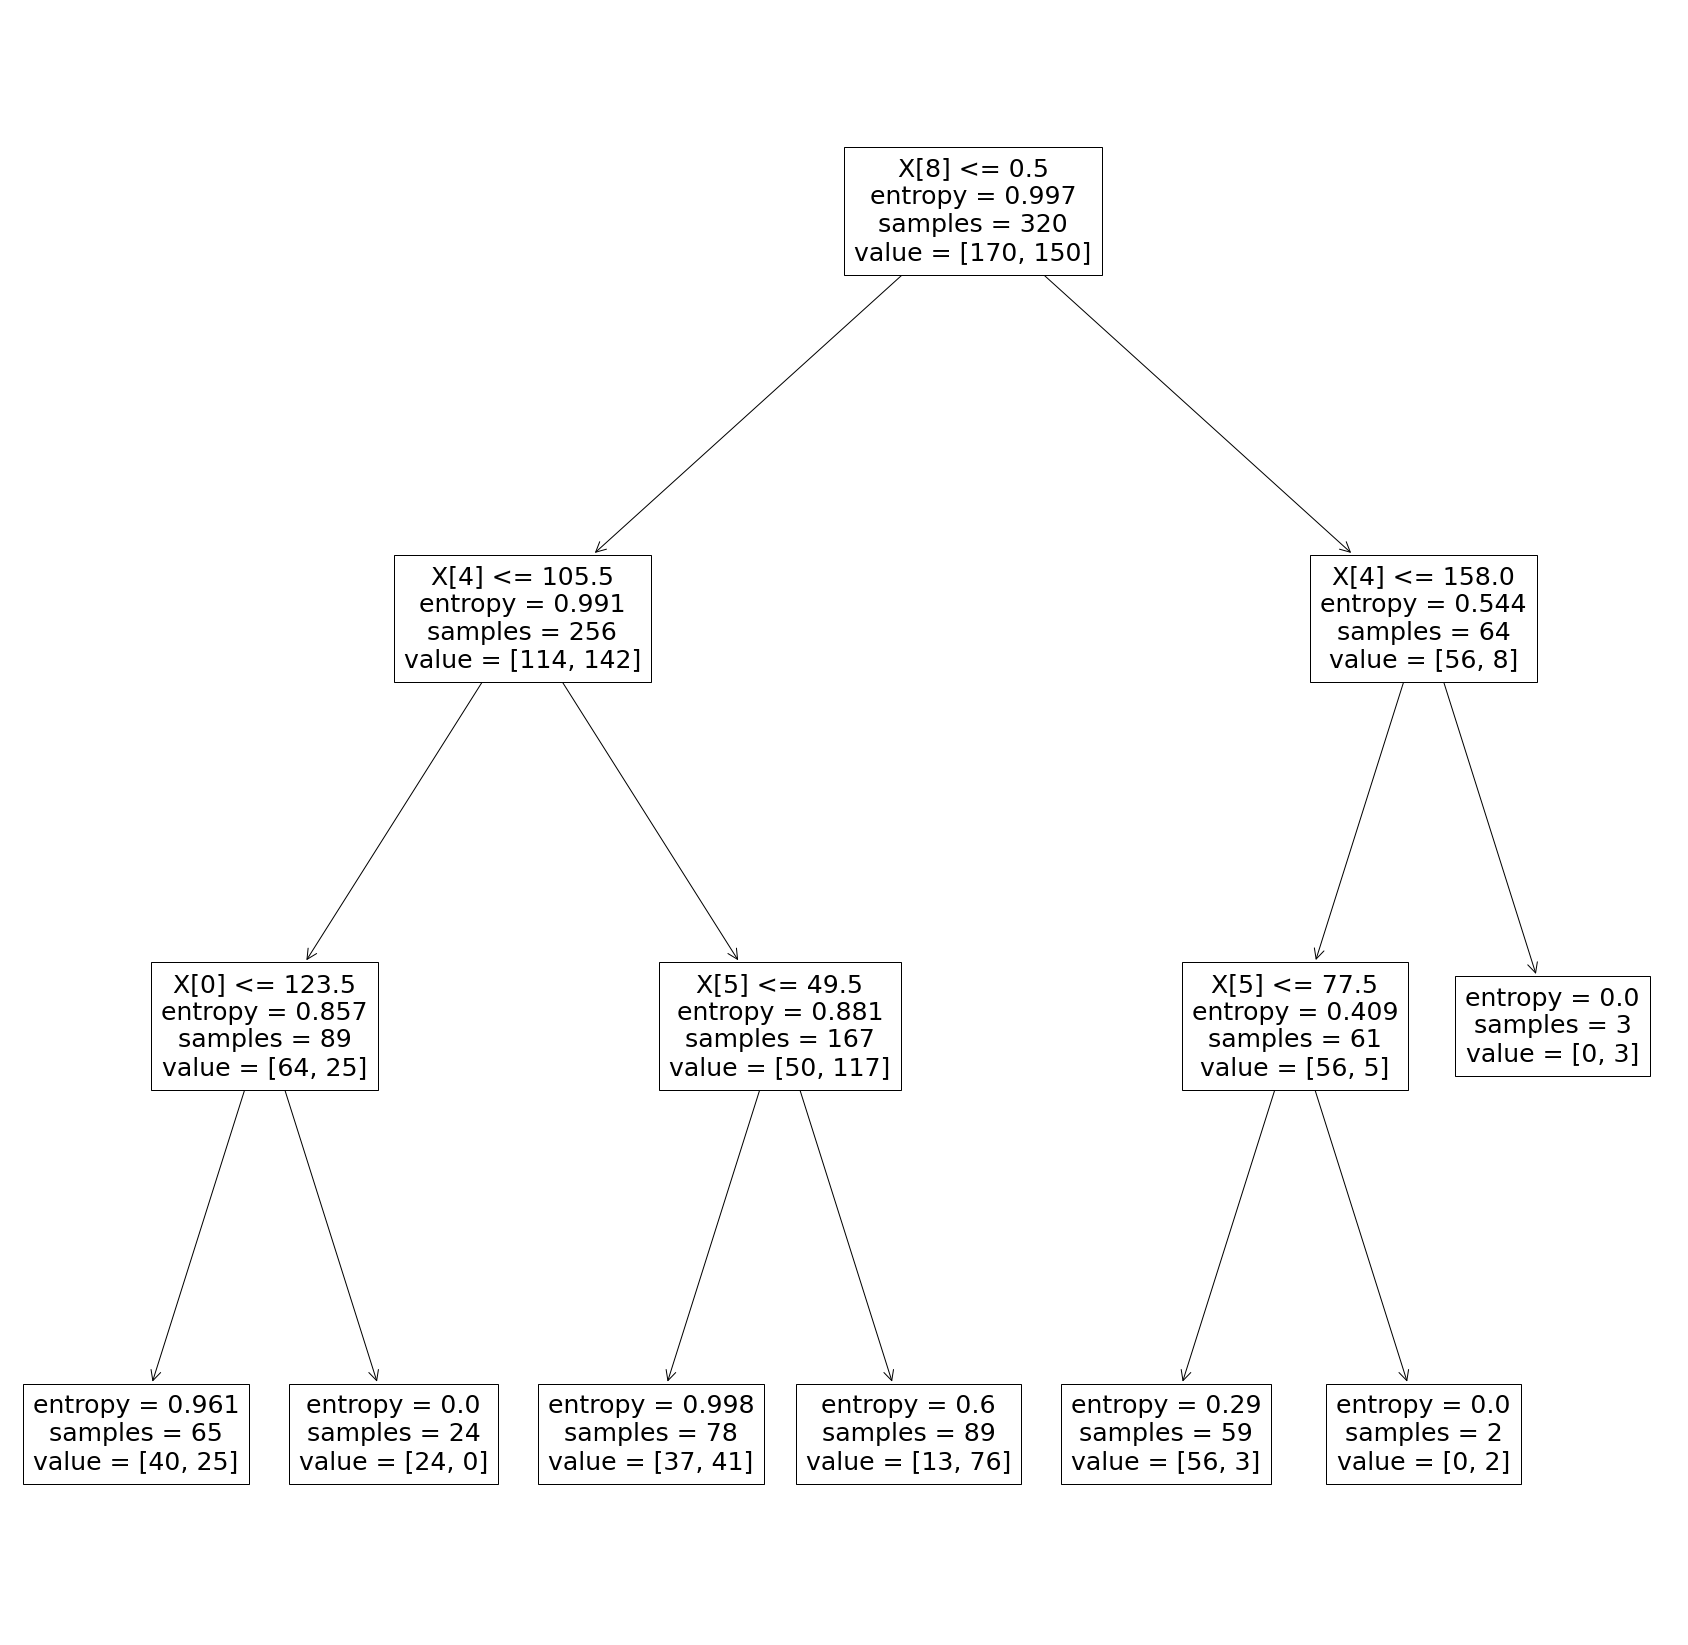

In [13]:
plt.figure(figsize=(30, 30))
tree.plot_tree(model);

In [14]:
predict = model.predict(X_test)
pd.Series(predict).value_counts()

Low     41
High    39
dtype: int64

In [15]:
pd.crosstab(Y_test,predict)

col_0,High,Low
Sales_Efficiency,,
High,33,13
Low,6,28


In [16]:
Y_test.value_counts()

High    46
Low     34
Name: Sales_Efficiency, dtype: int64

In [17]:
np.mean(predict==Y_test)

0.7625

In [18]:
model.score(X_train,Y_train)

0.75625

In [19]:
#importing metrics for accuracy calculation (confusion matrix)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predict)*100

76.25

# The accuracy is 76.25%